# About

Main purpose of this notebook is to get our data loaded into Torch such that we can start experimenting with NN


In [3]:
%matplotlib notebook

import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, sampler
from torchvision import transforms, utils
from torch.utils.data.dataset import random_split
from mpl_toolkits.mplot3d import Axes3D

# Loading our own functions
from libs.data_utils import HandDataset, ToTensor, Scale
from libs.layer_utils import flatten, random_weight, zero_weight

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
USE_GPU = False

dtype = torch.float32

if USE_GPU and torch.cuda.is_available(): 
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
# Constant to control how frequently we print train loss
print_every = 100
print('using device:', device)

using device: cpu


## Dataset Class

Lets load our csv into our dataset class and do a quick sanity check to see if our data is correct.

<IPython.core.display.Javascript object>


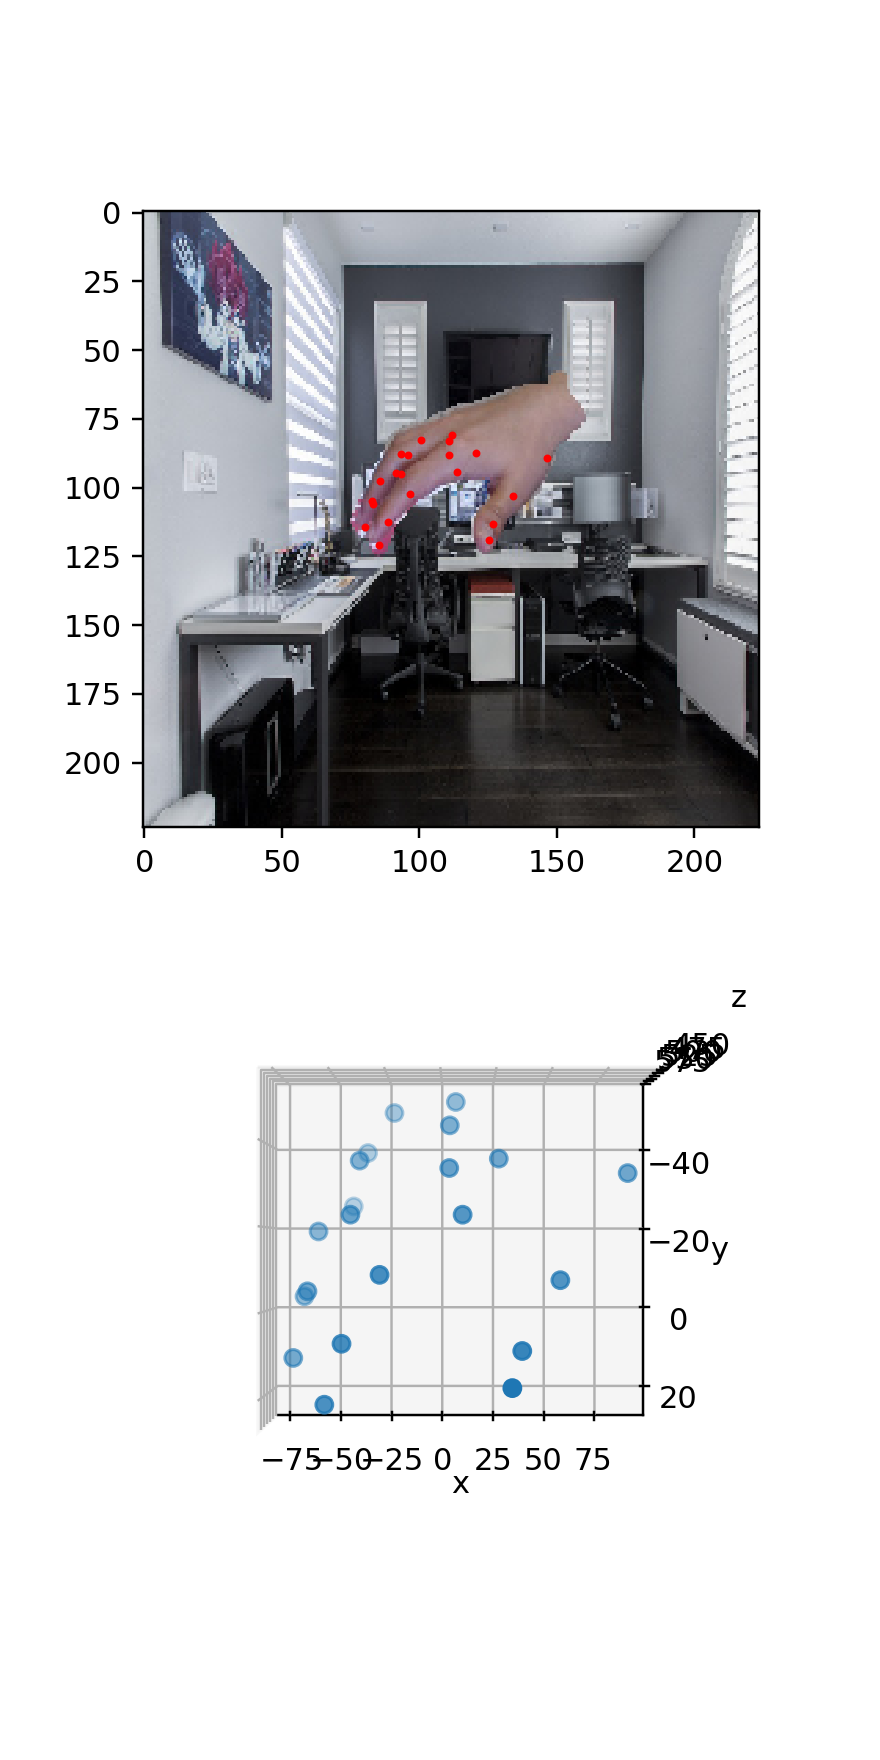

In [5]:
handDataset = HandDataset('dataset.csv', transform=Scale(224,224))
sample = handDataset[np.random.randint(len(handDataset))]

def show_joints(image, pos_2d, pos_3d):
    fig = plt.figure(figsize=plt.figaspect(2.))
    ax = fig.add_subplot(2,1,1)
    height, width, depth = image.shape
    ax.imshow(image)
    ax.scatter(pos_2d[:,0], pos_2d[:, 1], s=10, marker='.', c='r')
    ax = fig.add_subplot(2,1,2, projection="3d")
    ax.view_init(-90,-90)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(pos_3d[:,0], pos_3d[:,1], pos_3d[:,2], s=30)
    plt.show()


show_joints(sample['image'], sample['pos_2d'], sample['pos_3d'])

In [6]:
transform = transforms.Compose([
    Scale(224,224),
    ToTensor(),
])

hand_train = HandDataset('dataset.csv', transform=transform, train=True)
N = 100 #len(hand_train)
loader_train = DataLoader(hand_train, batch_size=5,
            sampler=sampler.SubsetRandomSampler(range(int(N*0.8))))

hand_val = HandDataset('dataset.csv', transform=transform, train=True)
loader_val = DataLoader(hand_val, batch_size=5,
            sampler=sampler.SubsetRandomSampler(range(int(N*0.8), int(N*0.9))))

hand_test = HandDataset('dataset.csv', transform=transform, train=False)
loader_test = DataLoader(hand_test, batch_size=5,
                         sampler=sampler.SubsetRandomSampler(range(int(N*0.9),N)))



In [ ]:

for i_batch, sample_batched in enumerate(loader_train):
    print(i_batch, sample_batched['image'].size())
    print(i_batch, sample_batched['image'].size())
    break
        